<a href="https://colab.research.google.com/github/Mario-Canon-Ayala/TDO/blob/main/Copia_de_Inundaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Riesgo de inundaciones en un municipio**

El municipio de Platot se ubica en la rivera del rio Bravo y es constante que ocurran desbordamientos del río en la temporada invernal. La administración municipal ha invertido en mediciones de variables ambientales para monitorear las inundaciones en puntos del casco urbano y rural en tiempo real. Las variables que se miden son las siguientes:

$$\scriptsize{
\begin{array}{ccl}
\hline
\textbf{Variable} & \textbf{Unidad} & \textbf{Descripción} \\
\hline
\text{Precipitacion_7dias} & \text{mm} & \text{Acumulado de lluvia en los últimos 7 días} \\
\hline
\text{Caudal_Rio} & \text{m³/s} & \text{Caudal promedio diario del río} \\
\hline
\text{Altura_Nivel_Rio} & \text{metros} & \text{Altura del nivel del río respecto al umbral crítico} \\
\hline
\text{Cobertura_Suelo} & \text{índice (0 a 1)} & \text{Proporción de cobertura vegetal (menor cobertura = más riesgo)} \\
\hline
\text{Pendiente_Terreno} & \text{grados} & \text{Inclinación media del terreno (menor pendiente = más propenso a inundarse)} \\
\hline
\text{Distancia_Rio} & \text{metros} & \text{Distancia del centro urbano al cauce más cercano del río} \\
\hline
\text{Inundacion} & \text{probabilidad (0 o 1)} & \text{Variable objetivo: 1 si hubo inundación, 0 si no} \\
\hline
\end{array}}
$$

Para generar un sistema de alertas, se ha propuesto realizar un modelo predictivo que permita predecir las inundaciones usando los datos históricos de mediciones entre 2022 y 2023.

**Objetivos**

1. Realizar un modelo predictivo, evalúe su rendimiento en el contexto.
2. Evaluar las variables más importantes para la predicción para sugerir la implementación de sensores en nuevos lugares de medición.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos de mediciones de innundación
df = pd.read_csv('base_inundaciones_2_anos.csv')
df.head()

,Fecha,Precipitacion_7dias,Caudal_Rio,Altura_Nivel_Rio,Cobertura_Suelo,Pendiente_Terreno,Distancia_Rio,Inundacion
0,2022-01-01,35.9,203.3,0.52,0.32,2.8,889.0,0
1,2022-01-02,22.9,196.0,2.05,0.55,6.7,529.0,0
2,2022-01-03,21.8,236.8,3.27,0.35,6.8,825.0,0
3,2022-01-04,22.3,188.4,2.50,0.66,1.9,684.0,0
4,2022-01-05,71.8,210.7,2.21,0.83,8.2,315.0,0


In [ ]:
df.describe(include='all')

,Fecha,Precipitacion_7dias,Caudal_Rio,Altura_Nivel_Rio,Cobertura_Suelo,Pendiente_Terreno,Distancia_Rio,Inundacion
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,30.797808,201.752329,2.036548,0.591082,4.962192,589.968493,0.076712
std,NaN,22.306991,39.371692,0.648615,0.173479,2.050373,279.464318,0.266317
min,NaN,-8.000000,82.400000,0.210000,0.300000,0.000000,50.000000,0.000000
25%,NaN,15.400000,175.525000,1.582500,0.440000,3.500000,400.000000,0.000000
50%,NaN,26.200000,200.800000,2.065000,0.580000,4.950000,598.000000,0.000000
75%,NaN,41.500000,228.200000,2.490000,0.740000,6.200000,793.250000,0.000000


In [ ]:
# Crear un modelo de ML para hacer predicciones de si va a ocurrir una inundación
df2 = df.drop('Fecha',axis=1)
X = df2.drop('Inundacion', axis=1)
y = df2['Inundacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predecir con los datos de prueba
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]


# Evaluación del modelo por ROC (1 = predicción perfecta, 0.5 = es igual que predecir con números aleatorios, 0 = Es peor que predecir con aleatorios)

print("Clasificación:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):}")

Clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       202
           1       0.89      0.47      0.62        17

    accuracy                           0.95       219
   macro avg       0.92      0.73      0.80       219
weighted avg       0.95      0.95      0.95       219

ROC AUC: 0.9834012813046011


El modelo creado muestra acertó en el 89% de las veces en que se presentó inundación. En las ocasiones en que el modelo detectó una inundación dado que ocurrió fue del 47%. El ROC del modelo es de 0.98, evidenciando que el modelo predice casi de manera perfecta la ocurrencia o no de inundaciones. No obstante, pueden probarse más modelos e integrar más datos ya que se evidencia mediante el recall de inundaciones que debe mejorarse la predicción en los casos que ocurre una inundación. Esta situación puede ser consecuencia de la poca cantidad de datos cuando ocurre una inundación.

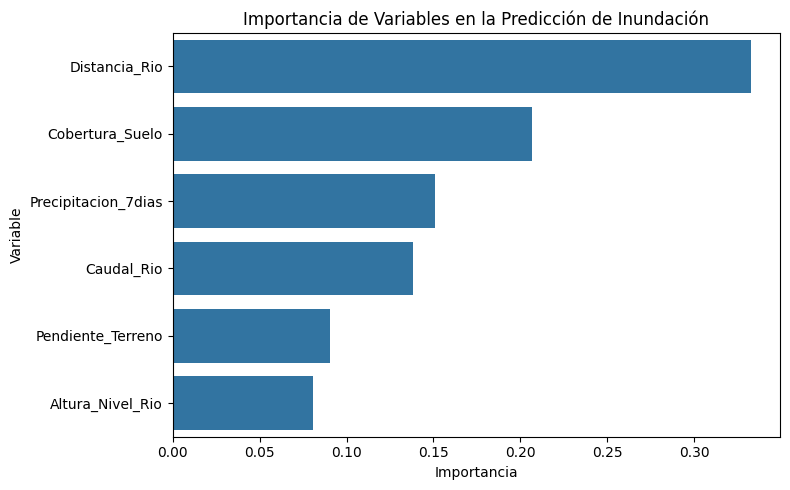

              Variable  Importancia
5        Distancia_Rio     0.332788
3      Cobertura_Suelo     0.206877
0  Precipitacion_7dias     0.150898
1           Caudal_Rio     0.138364
4    Pendiente_Terreno     0.090366
2     Altura_Nivel_Rio     0.080706


In [ ]:
# Calcular importancia de variables para generar la predicción

importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importancia, y='Variable', x='Importancia')
plt.title("Importancia de Variables en la Predicción de Inundación")
plt.tight_layout()
plt.show()

print(importancia)

La variable que mejor aporta a la predicción del modelo es la distancia del río (0.33), seguida de la cobertura del suelo (0.21) y las precipitaciones de los últimos 7 días (0.15). Se recomienda realizar planos de riesgo por ubicaciones por distancias y cobertura del suelo. se debe mantener vigilancia de las precipitaciones ya que tienen un impacto en la previsión.